In [72]:
import pandas as pd

In [73]:
data = pd.read_csv("datasets/emails.csv")

data.head()

,Spam,Message
0,0,Please call me at 8
1,1,Free money is available for you
2,0,I study he studies they are students I studied...
3,1,I am working at office now to 9 evening
4,0,U dun say so early hor... U c already then say...


In [74]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def process_text(text):
  stop_words = stopwords.words("english")
  stemmer = PorterStemmer()

  tokens = word_tokenize(text.lower())
  tokens = [token for token in tokens if token not in string.punctuation]
  tokens = [token for token in tokens if token not in stop_words]
  tokens = [stemmer.stem(token) for token in tokens]

  processed_text = " ".join(tokens)

  # \S any character except space
  # + one or more match
  # any string that starts with http or www
  processed_text = re.sub(r"http\S+|www\S+", "", processed_text)

  # \d any number
  processed_text = re.sub(r"\d+", "", processed_text)

  return processed_text

In [75]:
message = "Hello! There are 5678 examples of emails for spam classification. "

process_text(message)

'hello  exampl email spam classif'

In [76]:
data["processed_message"] = data["Message"].apply(process_text)

data.head()

,Spam,Message,processed_message
0,0,Please call me at 8,pleas call
1,1,Free money is available for you,free money avail
2,0,I study he studies they are students I studied...,studi studi student studi yesterday
3,1,I am working at office now to 9 evening,work offic even
4,0,U dun say so early hor... U c already then say...,u dun say earli hor ... u c alreadi say ...


In [77]:
from wordcloud import WordCloud

spam_data = data[data["Spam"] == 1]

words_lists = spam_data["processed_message"].astype(str)

words_string = " ".join(words_lists)

spam_wordcloud = WordCloud(width = 500, height = 300).generate(words_string)

(-0.5, 499.5, 299.5, -0.5)

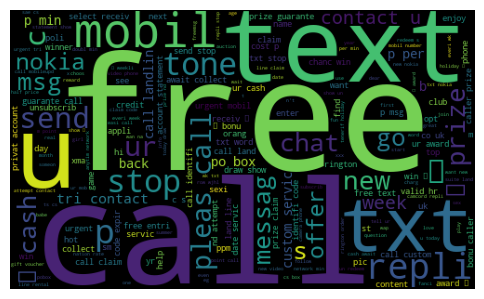

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 4))
plt.imshow(spam_wordcloud)
plt.axis("off")

Build model with Count Vectorization

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

# corpus in data science is a collection of written or spoken language
corpus = data["processed_message"]

max_features = 100

vectorizer = CountVectorizer(max_features = max_features)
vectors = vectorizer.fit_transform(corpus)

In [80]:
from sklearn.model_selection import train_test_split

x = vectors.toarray()
y = data["Spam"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

In [81]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(64, input_dim = x_train.shape[1], activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [82]:
model.fit(x_train, y_train, batch_size = 32, epochs = 10)

Epoch 1/10
123/123 [==============================] - 1s 3ms/step - loss: 0.3882 - accuracy: 0.8696
Epoch 2/10
123/123 [==============================] - 0s 3ms/step - loss: 0.1585 - accuracy: 0.9472
Epoch 3/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1236 - accuracy: 0.9592
Epoch 4/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1124 - accuracy: 0.9633
Epoch 5/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1056 - accuracy: 0.9653
Epoch 6/10
123/123 [==============================] - 0s 2ms/step - loss: 0.0996 - accuracy: 0.9686
Epoch 7/10
123/123 [==============================] - 0s 2ms/step - loss: 0.0941 - accuracy: 0.9684
Epoch 8/10
123/123 [==============================] - 0s 2ms/step - loss: 0.0898 - accuracy: 0.9704
Epoch 9/10
123/123 [==============================] - 0s 2ms/step - loss: 0.0831 - accuracy: 0.9745
Epoch 10/10
123/123 [==============================] - 0s 2ms/step - loss: 0.0796 - accuracy: 0.9750

In [83]:
y_predict = model.predict(x_test)

# based on sigmoid threshold of 0.5 round predictions to 0 or 1 
y_predict = y_predict.round()

41/41 [==============================] - 0s 2ms/step


In [84]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.9671002295332823

Build model with TF-IDF Vectorization

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = max_features)
vectors = vectorizer.fit_transform(corpus)

In [86]:
x = vectors.toarray()
y = data["Spam"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

In [87]:
model = Sequential()

model.add(Dense(64, input_dim = x_train.shape[1], activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [88]:
model.fit(x_train, y_train, batch_size = 32, epochs = 10)

Epoch 1/10
123/123 [==============================] - 1s 2ms/step - loss: 0.3971 - accuracy: 0.8615
Epoch 2/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1923 - accuracy: 0.9276
Epoch 3/10
123/123 [==============================] - 0s 4ms/step - loss: 0.1378 - accuracy: 0.9523
Epoch 4/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1219 - accuracy: 0.9605
Epoch 5/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1137 - accuracy: 0.9625
Epoch 6/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1077 - accuracy: 0.9645
Epoch 7/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1031 - accuracy: 0.9661
Epoch 8/10
123/123 [==============================] - 0s 2ms/step - loss: 0.0965 - accuracy: 0.9676
Epoch 9/10
123/123 [==============================] - 0s 2ms/step - loss: 0.0918 - accuracy: 0.9704
Epoch 10/10
123/123 [==============================] - 0s 2ms/step - loss: 0.0878 - accuracy: 0.9722

In [89]:
y_predict = model.predict(x_test)

# based on sigmoid threshold of 0.5 round predictions to 0 or 1 
y_predict = y_predict.round()

41/41 [==============================] - 0s 2ms/step


In [90]:
accuracy_score(y_test, y_predict)

0.9701606732976281

In [93]:
sample_data = ["call to get free prize one million dollars"]

sample_data = [process_text(message) for message in sample_data]

vectors = vectorizer.transform(sample_data)

y_predict = model.predict(vectors.toarray())

# based on sigmoid threshold of 0.5 round predictions to 0 or 1 
y_predict.round()

1/1 [==============================] - 0s 34ms/step


array([[1.]], dtype=float32)